# Faraday Effect / Lock-in Amplifier
Devin Cunningham <br>
Partners: Max Casebolt, Alex Colbaugh

### Abstract:
We attempt to measure the verdet constant using a Lock-in amplifier. Our measured value does not match theoretical value, although this may be due to adjustments of the analyzer polarizer.

### Introduction and theoretical overview:
The Faraday effect occurs when light is introduced to a magnetic field in a medium. The plane of polarization rotates. In this experiment, a laser light is incident on a Schott glass. The signal is manufactured by a lock-in amplifier, which helps to reduce the effects of noise and interference. After going through two polarizers, the laser is measured by a light sensitive diode. The measurement corresponds to the Verdet constant $v$, an optical constant which describes the strength of the Faraday effect for a material. To determine this, we use the relationship $v = \frac{\theta}{BL} = \frac{\pi\Delta nL}{BL\lambda}$, where $\Delta$n represents the magnitude of circular birefringene, $L$ represents the length of the medium traversed, $\lambda$ represents the wavelength of light in vacuum, $B$ represents the strength of the magnetic field, and $\theta$ represents the angle of maximum intensity.

### Experimental Setup and Procedures:
We first set out to determine the angle of maximum intensity. To do this, we initialized our analyzer polarizer by calibrating it to zero degrees. After giving power to the laser and connecting it to the DC voltmeter, we found the rotation of the polarizer axes where the voltage is at a maximum value.
<br>


### Experimental Data and Error Analysis:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.interpolate import UnivariateSpline, interp1d

def beautification():
    ax.set_facecolor('whitesmoke')
    ax.patch.set_alpha(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.minorticks_on()
    ax.tick_params('both', length=8, which='major', labelsize='10')
    ax.tick_params('both',length=3, which='minor')
    ax.grid(True, which='major', ls='dashed', alpha=.5)
    ax.grid(True, which='minor', ls='dashed', alpha=.15)
    ax.legend(loc='best')

def minimalization():
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

colors = [np.array([141,211,199])/255., np.array([190,186,218])/255., np.array([251,128,114])/255.,
          np.array([128,177,211])/255., np.array([253,180,98])/255.,
          np.array([179,222,105])/255., np.array([252,205,229])/255.,
          np.array([217,217,217])/255., np.array([188,128,189])/255.]

### Confirming Malus Law

Background about Malus Law

In [2]:
# =======================================================================
# ------------------------Data and Calculations--------------------------
# =======================================================================

data_1k = np.zeros(37, dtype=[('voltage', float, 1),
                             ('current', float, 1),
                             ('phase',   float, 1)])
data_1k['voltage'] = np.array([6.25, 13.57, 23.31, 34.61, 50.77, 68.89,
                               86.09, 102.57, 119.96, 139.04, 155.02, 168.62,
                               184.14, 194.25, 202.40, 208.80, 206.70, 205.30,
                               197.45, 194.72, 188.12, 180.35, 163.36, 151.57,
                               134.08, 109.82, 93.48, 74.72, 59.73, 44.15,
                               30.03, 19.03, 10.69, 4.80, 1.78, 2.11, 5.55])
data_1k['current'] = data_1k['voltage'] / 1000.
data_1k['phase'] = np.arange(0,len(data_1k['voltage'])*5,5)

s_data_1k = UnivariateSpline(data_1k['phase'], data_1k['current'], k=4, s=1)
xs_data_1k = np.linspace(min(data_1k['phase']), max(data_1k['phase']), 1000)
ys_data_1k = s_data_1k(xs_data_1k)
roots_data_1k = s_data_1k.derivative().roots()
mins_data_1k = roots_data_1k[1::2]
print roots_data_1k

[  81.60140058  168.92619475]


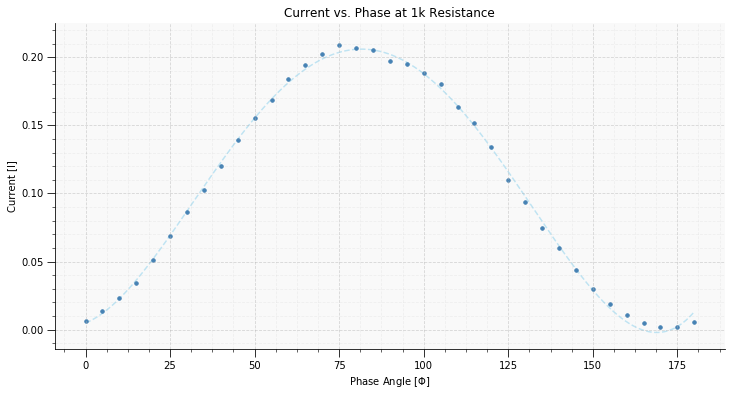

In [5]:
# =======================================================================
# ------------------------------Plotting---------------------------------
# =======================================================================

height_ratios = [6]
width_ratios = [12]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)
fig.suptitle('', fontsize=20)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(data_1k['phase'], data_1k['current'], marker='o', s=12, c = 'steelblue')
ax.plot(xs_data_1k, ys_data_1k, '--', c='skyblue', alpha = .5, zorder=0)
ax.update({'title': 'Current vs. Phase at 1k Resistance',
            'xlabel': 'Phase Angle [$\Phi$]',
            'ylabel': 'Current [I]'})
beautification()
plt.show()

In [82]:
75 + 25./4

81.25

### Experiments With Indvidiual SPLIA Componenets
Background aboput next thing

### Measurement of Verdet Constant Using Lock-in Amplifier

In [151]:
data_verdet_2 = np.zeros(11, dtype=[('v_lock', float, 1),
                                    ('v_dc', float, 1),
                                    ('v_dc_err', float, 1),
                                    ('B_rms', float, 1)])
data_verdet_2['v_lock'] = np.array([.146, .665, 1.66, 2.614, 3.496, 4.502, 5.372,
                                    6.356, 7.236, 8.157, 8.635]) / (5000.*.707)
data_verdet_2['v_dc'] = np.array([.088, .088, .088, .0885, .0884, .0883, .0886,
                                  .0887, .0888, .0887, .0886])
data_verdet_2['v_dc_err'] = np.array([.0001])
data_verdet_2['B_rms'] = np.array([0,.12,.32,.55,.76,.99,1.19,1.41,1.6,1.82,1.92]) / 1000.

verdet_2_v_ratio = data_verdet_2['v_lock'] / data_verdet_2['v_dc']
verdet_2_right = 2. * data_verdet_2['B_rms'] * .1

print data_verdet_2
fit_verdet_2 = np.polyfit(verdet_2_v_ratio,verdet_2_right,1)
fit_verdet_2 = np.poly1d(fit_verdet_2)
fit_verdet_2_x = np.linspace(min(verdet_2_v_ratio), max(verdet_2_v_ratio), 100)
print fit_verdet_2

[(  4.13012730e-05,  0.088 ,  0.0001,  0.     )
 (  1.88118812e-04,  0.088 ,  0.0001,  0.00012)
 (  4.69589816e-04,  0.088 ,  0.0001,  0.00032)
 (  7.39462518e-04,  0.0885,  0.0001,  0.00055)
 (  9.88967468e-04,  0.0884,  0.0001,  0.00076)
 (  1.27355021e-03,  0.0883,  0.0001,  0.00099)
 (  1.51966054e-03,  0.0886,  0.0001,  0.00119)
 (  1.79801980e-03,  0.0887,  0.0001,  0.00141)
 (  2.04695898e-03,  0.0888,  0.0001,  0.0016 )
 (  2.30749646e-03,  0.0887,  0.0001,  0.00182)
 (  2.44271570e-03,  0.0886,  0.0001,  0.00192)]
 
0.01427 x - 8.101e-06


In [186]:
data_verdet = np.zeros(1, dtype=[('v_lock', float, 1),
                                 ('v_dc', float, 1),
                                 ('v_dc_err', float, 1),
                                 ('B_rms', float, 1)])
#data_verdet['v_lock'] = np.array([.146, .665, 1.66, 2.614, 3.496, 4.502, 5.372,
#                                  6.356, 7.236, 8.157, 8.635]) / (5000.*.707)
#data_verdet['v_dc'] = np.array([.088, .088, .088, .0885, .0884, .0883, .0886,
#                                .0887, .0888, .0887, .0886])
#data_verdet['v_lock'] = np.array([.003, .525, 1.5, 2.4, 3.29, 4.25, 5.2, 6.13,
#                                  6.95, 7.98, 8.32]) / (5000.)
#data_verdet['v_dc'] = np.array([.0898])
data_verdet['v_lock'] = np.array([8.615]) / (5000.)
data_verdet['v_dc'] = np.array([.1044])
data_verdet['v_dc_err'] = np.array([.0001])
data_verdet['B_rms'] = np.array([1.92]) / 1000.
verdet_v_ratio = data_verdet['v_lock'] / data_verdet['v_dc']
verdet_right = 2. * data_verdet['B_rms'] * .1

print (data_verdet['v_lock']/data_verdet['v_dc'])/2/.1/.00192

print data_verdet
fit_verdet = np.polyfit(verdet_right,verdet_v_ratio,1)
fit_verdet = np.poly1d(fit_verdet)
fit_verdet_x = np.linspace(min(verdet_right), max(verdet_right), 100)
print fit_verdet
#roots_data_verdet = s_data_verdet.derivative().roots()
#mins_data_verdet = roots_data_verdet[1::2]
#print roots_data_1k

[ 42.97872765]
[( 0.001723,  0.1044,  0.0001,  0.00192)]
 
21.49 x + 0.008252


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: RankWarning: Polyfit may be poorly conditioned


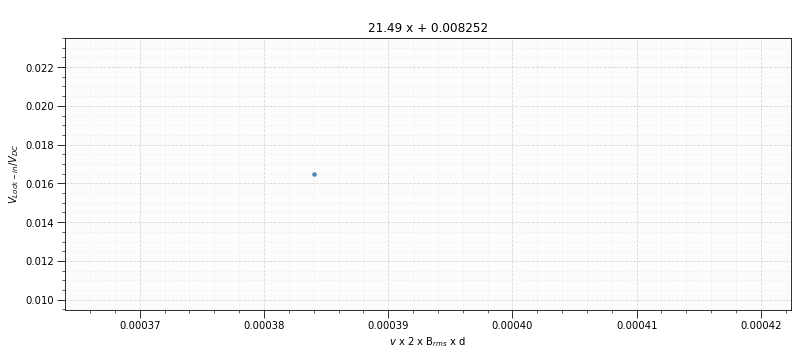

In [183]:
# =======================================================================
# ------------------------------Plotting---------------------------------
# =======================================================================

height_ratios = [5]
width_ratios = [13]
wspace = 0
hspace = 0
fig = plt.figure(figsize=(sum(width_ratios) + wspace *
                          (len(width_ratios) - 1),
                          sum(height_ratios) + hspace *
                          (len(height_ratios) - 1)))
gs = gridspec.GridSpec(len(height_ratios),
                       len(width_ratios),
                       height_ratios=height_ratios,
                       width_ratios=width_ratios)
fig.suptitle('', fontsize=20)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(verdet_right, verdet_v_ratio, marker='o', s=12, c = 'steelblue')
ax.plot(fit_verdet_x, fit_verdet(fit_verdet_x), '--', c='skyblue', alpha = .5, zorder=0)
ax.update({'title': '{}'.format(fit_verdet),
            'ylabel': '$V_{Lock-in} / {V_{DC}}$',
            'xlabel': '$v$ x 2 x B$_{rms}$ x d'})
ax.set_facecolor('whitesmoke')
ax.patch.set_alpha(.25)
ax.minorticks_on()
ax.tick_params('both', length=8, which='major')
ax.tick_params('both',length=3, which='minor')
ax.grid(True, which='major', ls='dashed', alpha=.5)
ax.grid(True, which='minor', ls='dashed', alpha=.15)
ax.set_xlim((min(verdet_right)-.00002, max(verdet_right)*1.1))
plt.show()

### Discussion and Conclusion:
Heindl: Adjustments of the analyzer polarizer made our verdet constant off.

### References:
Shoutout to the homies